# Module 2: Data Analysis
## Sprint 3: Statistical Modeling
## Part 5: Red Wine Quality


# Red Wine Quality

The data from [Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).



## Table of Content

- [Data Cleaning](#chapter1)
- [Outliers' Dataset vs non-Outliers' Dataset](#chapter2)
- [The Exploratory Data Analysis](#chapter3)
- [Hypothesis Testing](#chapter4)
- [Linear Regression](#chapte5)
- [Logistic Regression](#chapter6)
- [Conclusions](#chapter7)
- [References](#chapter8)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression,  LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
# from statsmodels.formula.api import ols  # For calculation of Ordinary least squares for ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
# from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison 
#                                 # For performing the Tukey-HSD test,  # To compare the levels  independent variables with the 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
from pandas.core.common import SettingWithCopyWarning

In [2]:
sns.set_palette('RdGy')
sns.set_style('white')
sns.set_context('notebook')
# setting the figure styling

In [3]:
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

## Data Cleaning <a class="anchor" id="chapter1"></a>

In [4]:
red_wine_df = pd.read_csv('winequality-red.csv')
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Need to check if there are NaNs:

In [5]:
red_wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no non-available values.

Here I am going to check if there is duplicated values across all dataframe:

In [6]:
duplicateRowsDF = red_wine_df[red_wine_df.duplicated()]
duplicateRowsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 4 to 1596
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         240 non-null    float64
 1   volatile acidity      240 non-null    float64
 2   citric acid           240 non-null    float64
 3   residual sugar        240 non-null    float64
 4   chlorides             240 non-null    float64
 5   free sulfur dioxide   240 non-null    float64
 6   total sulfur dioxide  240 non-null    float64
 7   density               240 non-null    float64
 8   pH                    240 non-null    float64
 9   sulphates             240 non-null    float64
 10  alcohol               240 non-null    float64
 11  quality               240 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 24.4 KB


We can see that ```red wine dataset``` has 240 duplicated rows. In this case I am going to get rid off of them.

In [7]:
red_wine_df.drop(red_wine_df[red_wine_df.duplicated() == True].index, inplace=True)

## Outliers' Dataset vs non-Outliers' Dataset <a class="anchor" id="chapter2"></a>

In this analysis section I am going to analyzehow outliers are distributed in each feature(column). Thus, I am going to check the distribution of each feature and see if the outliers have impact on it.

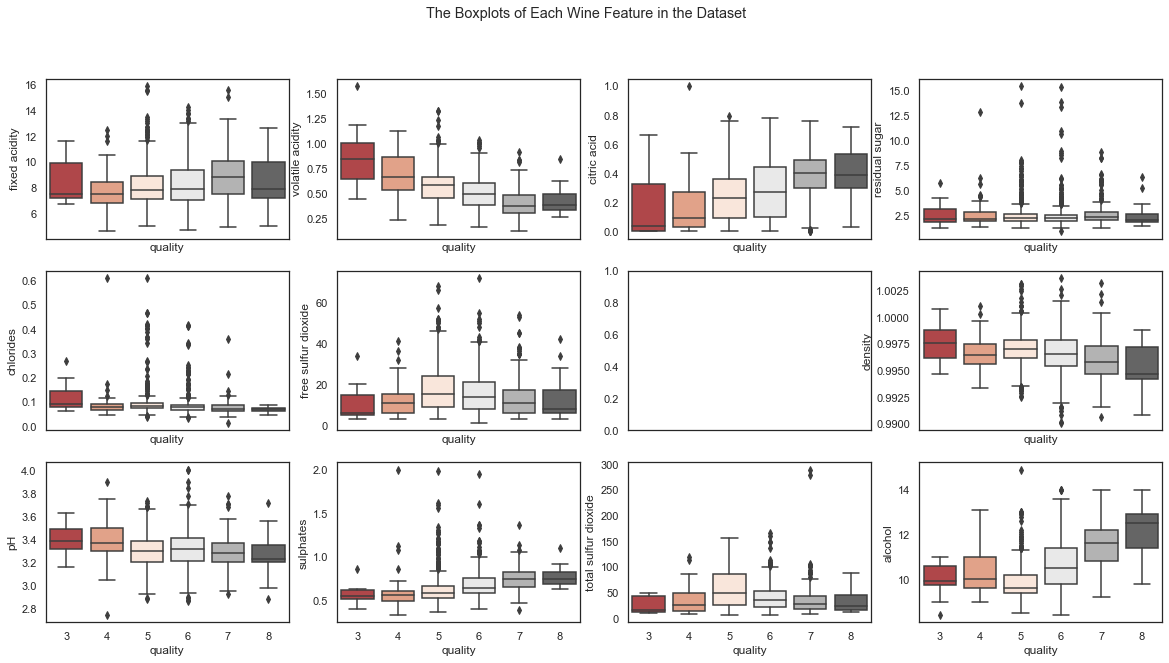

In [8]:
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(20,10))
fig.suptitle('The Boxplots of Each Wine Feature in the Dataset')
sns.boxplot(ax=axes[0, 0], data=red_wine_df, x='quality', y='fixed acidity')
sns.boxplot(ax=axes[0, 1], data=red_wine_df, x='quality', y='volatile acidity')
sns.boxplot(ax=axes[0, 2], data=red_wine_df, x='quality', y='citric acid')
sns.boxplot(ax=axes[0, 3], data=red_wine_df, x='quality', y='residual sugar')
sns.boxplot(ax=axes[1, 0], data=red_wine_df, x='quality', y='chlorides')
sns.boxplot(ax=axes[1, 1], data=red_wine_df, x='quality', y='free sulfur dioxide')
sns.boxplot(ax=axes[2, 2], data=red_wine_df, x='quality', y='total sulfur dioxide')
sns.boxplot(ax=axes[1, 3], data=red_wine_df, x='quality', y='density')
sns.boxplot(ax=axes[2, 0], data=red_wine_df, x='quality', y='pH')
sns.boxplot(ax=axes[2, 1], data=red_wine_df, x='quality', y='sulphates')
sns.boxplot(ax=axes[2, 3], data=red_wine_df, x='quality', y='alcohol');

```The Boxplots of Each Wine Feature in the Dataset``` shows that mostly every feature has outliers. Especially ```residual sugar```, ```chlorides```, and ```sulphates```.

Let's take a look how looks this data with outliers each feature distribution:

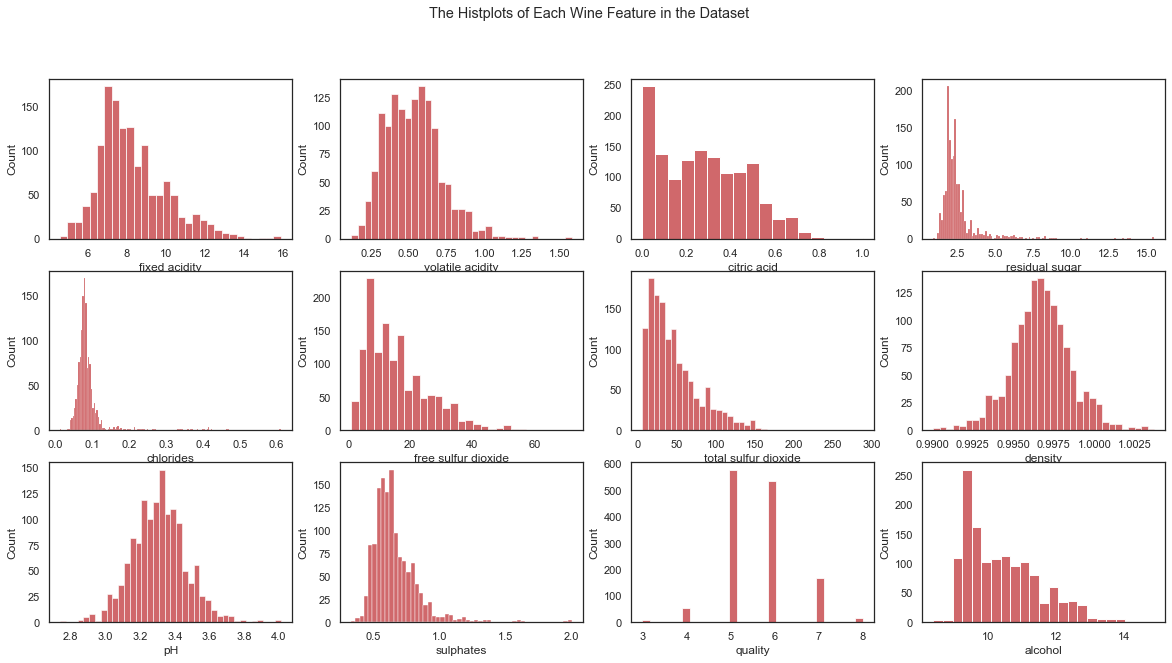

In [9]:
fig, axes = plt.subplots(3, 4, sharex=False, figsize=(20,10))
fig.suptitle('The Histplots of Each Wine Feature in the Dataset')
sns.histplot(ax=axes[0, 0], data=red_wine_df, x='fixed acidity')
sns.histplot(ax=axes[0, 1], data=red_wine_df, x='volatile acidity')
sns.histplot(ax=axes[0, 2], data=red_wine_df, x='citric acid')
sns.histplot(ax=axes[0, 3], data=red_wine_df, x='residual sugar')
sns.histplot(ax=axes[1, 0], data=red_wine_df, x='chlorides')
sns.histplot(ax=axes[1, 1], data=red_wine_df, x='free sulfur dioxide')
sns.histplot(ax=axes[1, 2], data=red_wine_df, x='total sulfur dioxide')
sns.histplot(ax=axes[1, 3], data=red_wine_df, x='density')
sns.histplot(ax=axes[2, 0], data=red_wine_df, x='pH')
sns.histplot(ax=axes[2, 1], data=red_wine_df, x='sulphates')
sns.histplot(ax=axes[2, 2], data=red_wine_df, x='quality')
sns.histplot(ax=axes[2, 3], data=red_wine_df, x='alcohol');

```The Histplots of Each Wine Feature in the Dataset``` shows that only ```pH```, ```quality```,  and ```density```  have normal distribution. The other ones - left skewed distributed data.

Now I am going to use IQR method for outlier removal.

Firstly, let's take a look what size is dataframe:

In [10]:
red_wine_df.shape

(1359, 12)

In [11]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 170.3 KB


In [12]:
Q1 = red_wine_df.quantile(0.25)
Q3 = red_wine_df.quantile(0.75)
IQR = Q3 - Q1

In [13]:
redwine_df_out = red_wine_df[~((red_wine_df < (Q1 - 1.5 * IQR)) |(red_wine_df > (Q3 + 1.5 * IQR))).any(axis=1)]
redwine_df_out.shape

(1005, 12)

Abvoe I applied IQR method, and it can be seen that the dataframe row quantity lowered from 1359 to 1005.

In the following steps I am going to plot once again boxplots and histplots of each feature:

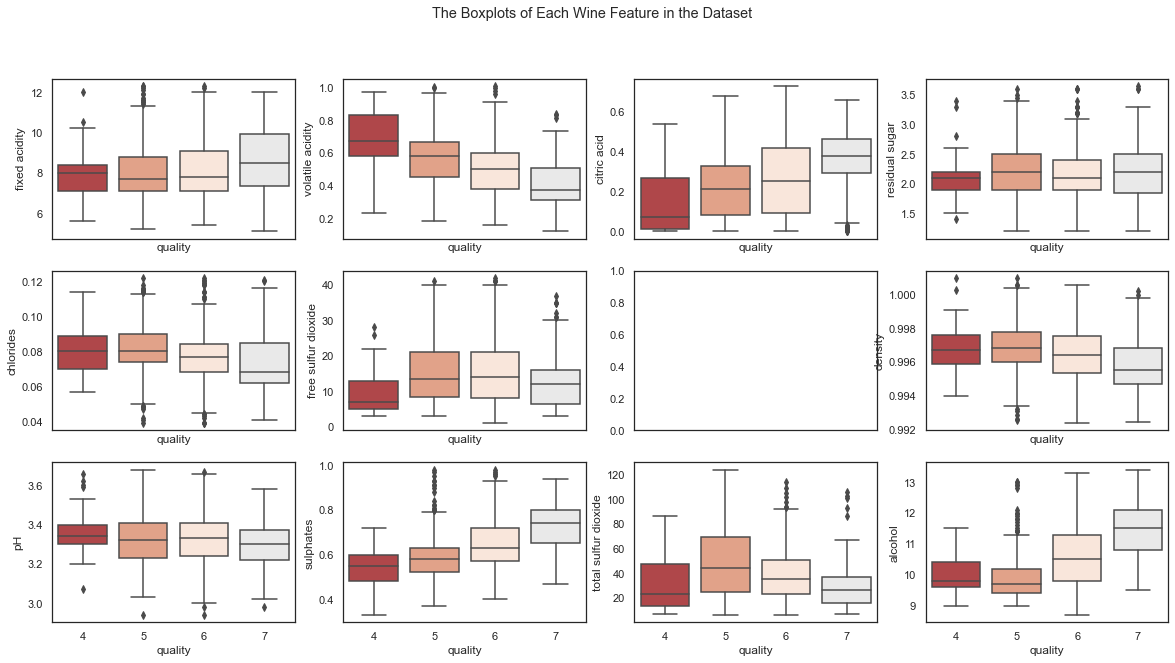

In [14]:
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(20,10))
fig.suptitle('The Boxplots of Each Wine Feature in the Dataset')
sns.boxplot(ax=axes[0, 0], data=redwine_df_out, x='quality', y='fixed acidity')
sns.boxplot(ax=axes[0, 1], data=redwine_df_out, x='quality', y='volatile acidity')
sns.boxplot(ax=axes[0, 2], data=redwine_df_out, x='quality', y='citric acid')
sns.boxplot(ax=axes[0, 3], data=redwine_df_out, x='quality', y='residual sugar')
sns.boxplot(ax=axes[1, 0], data=redwine_df_out, x='quality', y='chlorides')
sns.boxplot(ax=axes[1, 1], data=redwine_df_out, x='quality', y='free sulfur dioxide')
sns.boxplot(ax=axes[2, 2], data=redwine_df_out, x='quality', y='total sulfur dioxide')
sns.boxplot(ax=axes[1, 3], data=redwine_df_out, x='quality', y='density')
sns.boxplot(ax=axes[2, 0], data=redwine_df_out, x='quality', y='pH')
sns.boxplot(ax=axes[2, 1], data=redwine_df_out, x='quality', y='sulphates')
sns.boxplot(ax=axes[2, 3], data=redwine_df_out, x='quality', y='alcohol');

Here we can see that the boxplots are more like boxes (there is no narrowed boxes) and the outliers quanitty is way less than before.

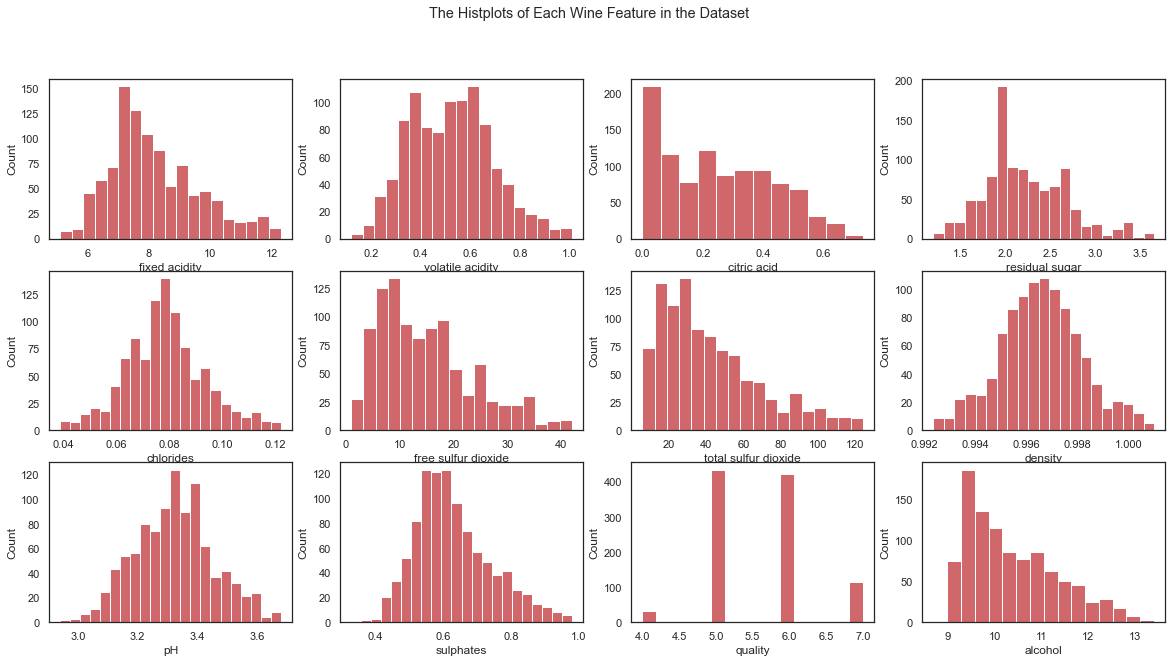

In [15]:
fig, axes = plt.subplots(3, 4, sharex=False, figsize=(20,10))
fig.suptitle('The Histplots of Each Wine Feature in the Dataset')
sns.histplot(ax=axes[0, 0], data=redwine_df_out, x='fixed acidity')
sns.histplot(ax=axes[0, 1], data=redwine_df_out, x='volatile acidity')
sns.histplot(ax=axes[0, 2], data=redwine_df_out, x='citric acid')
sns.histplot(ax=axes[0, 3], data=redwine_df_out, x='residual sugar')
sns.histplot(ax=axes[1, 0], data=redwine_df_out, x='chlorides')
sns.histplot(ax=axes[1, 1], data=redwine_df_out, x='free sulfur dioxide')
sns.histplot(ax=axes[1, 2], data=redwine_df_out, x='total sulfur dioxide')
sns.histplot(ax=axes[1, 3], data=redwine_df_out, x='density')
sns.histplot(ax=axes[2, 0], data=redwine_df_out, x='pH')
sns.histplot(ax=axes[2, 1], data=redwine_df_out, x='sulphates')
sns.histplot(ax=axes[2, 2], data=redwine_df_out, x='quality')
sns.histplot(ax=axes[2, 3], data=redwine_df_out, x='alcohol');

The data with lower number of outliers of each feature is normally distributed (exceptions: ```alcohol```, ```total sulfur dioxide```, ```citric acid```, and ```free sulfur dioxide```)

Here I could work with every feature seperately to eliminate all outliers or fill them with value median, but I am not going to do that in this case (the corr heatmaps and hypothesis testing are going to show me what features are essential to wine quality). 

## The Exploratory Data Analysis <a class="anchor" id="chapter3"></a>

The Exploratory Data Analysis is going to describe the ```redwine_df_out``` (a dataset without the outliers) characteristics.

Text(0.5, 1.0, 'The Spearman Correlation Heatmap of Red Wine Features')

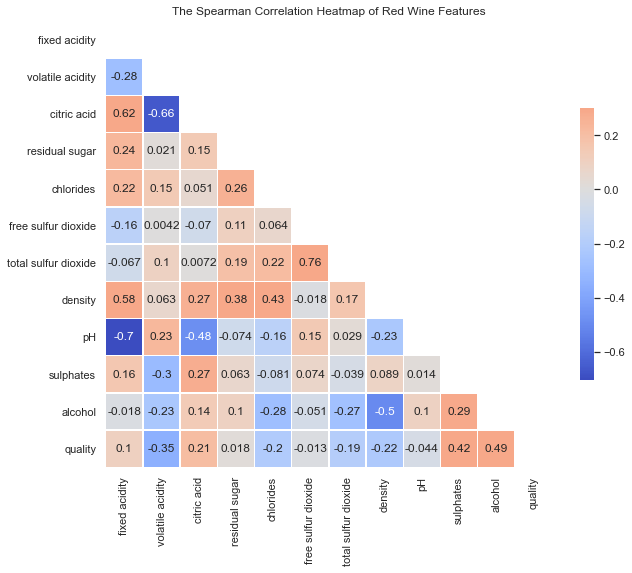

In [16]:
corr_data = redwine_df_out
corr = corr_data.corr(method="spearman")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask =mask, cmap= 'coolwarm', vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, ax = ax)
ax.set_title('The Spearman Correlation Heatmap of Red Wine Features');

As ```The Spearman Correlation Heatmap of Red Wine Features``` shows, there are some positive and negative correlations between the red wine features: 

Negative: ```pH``` x ```fixed acidity```, ```citric acid``` x ```volatile acidity```, ```density``` x ```alcohol```;

Positive: ```citric acid``` x ```fixed acidity```, ```density``` x ```fixed acidity```, ```total sulfur dioxide``` x ```free sulfur dioxide```, ```alcohol``` x ```quality```;

For the following plotting I am going ot use those features that showed any type of correlation:

In [17]:
columns_list = ['fixed acidity', 'citric acid', 'density', 'pH','alcohol', 'quality']

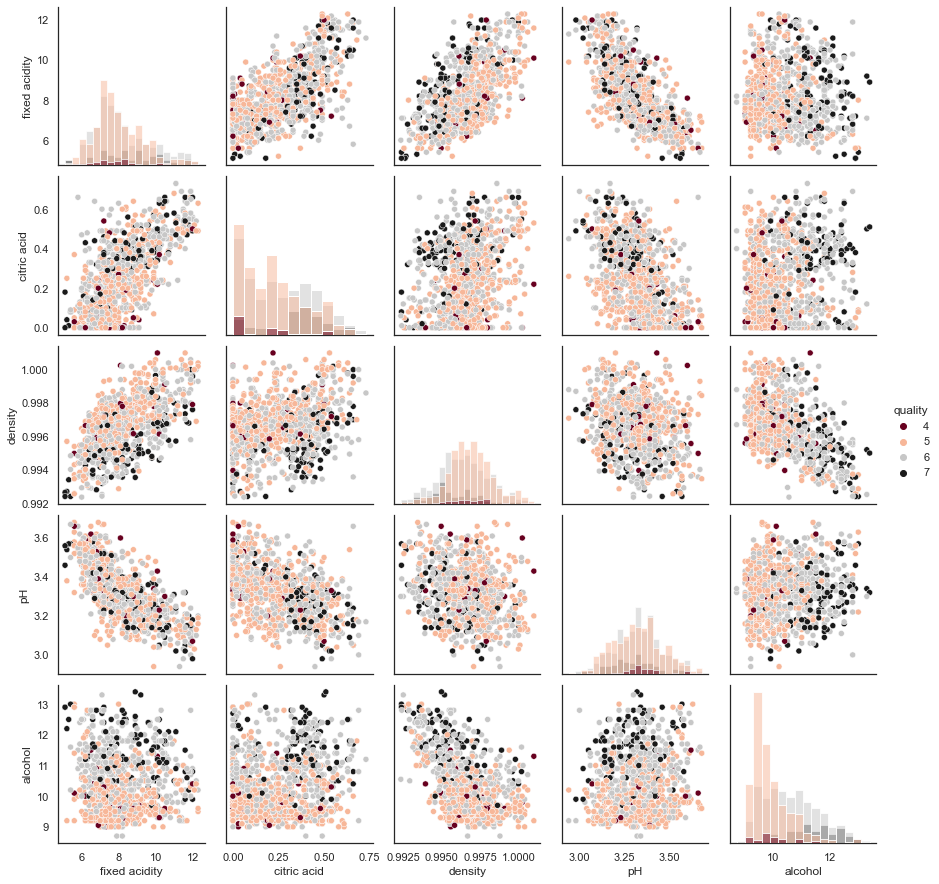

In [18]:
sns.pairplot(redwine_df_out[columns_list], hue='quality', diag_kind='hist', palette='RdGy');

Here I suspect that some features as ```pH``` or ```fixed_acidity``` has some impact on ```quality```, but judging by the eye I can not prove it. In the <b>Hyothesis Testing</b> I am going to find the features that has impact for the red wine quality.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


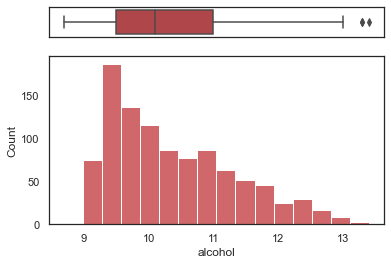

In [19]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(redwine_df_out['alcohol'], ax=ax_box)
sns.histplot(data=redwine_df_out, x='alcohol', ax=ax_hist)
ax_box.set(xlabel='')
plt.show();

## Hypothesis Testing <a class="anchor" id="chapter4"></a>

Python no matter how the data is distributed is going to fit line using least squared method. Here I am going to use that to check if that linear regression is significant (in other terms, test whether β₁ is significant or not).

$$y = \beta_{0} + \beta_{1}x $$

The Hypothesis testing is going to calculate the t-test score:

$$t - score = \frac{X - \mu}{\frac{s}{\sqrt{n}}}$$

Where, μ is the population mean and s is the sample standard deviation which when divided by √n is also known as standard error.

The p-value is calculated from the cumulative probability for the given t-score using the t-table.

If , p-value < 0.05, we can reject the null hypothesis. | p-value>0.05, we fail to reject the null hypothesis.

Thus, if β₁ is not a zero, the model can be used.

```The Red Wine Dataset``` has multiple features, thus, the multiple regression model is going to be used for this dataset.

$$y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} +\ldots+\beta_{j}x_{j}$$

The Hypothesis looks like this:

The Null Hypothesis H<sub>0</sub>: β<sub>0</sub>x<sub>0</sub> = β<sub>1</sub>x<sub>1</sub> = β<sub>2</sub>x<sub>2</sub> = ... =  β<sub>j</sub>x<sub>j</sub> 
       

Alternative Hypothesis H<sub>1</sub>: β<sub>j</sub> &ne; 0 for at least one j

In [20]:
lr_wines = redwine_df_out

In [21]:
y_train = lr_wines.pop('quality');
X_train = lr_wines;
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     54.81
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           1.66e-94
Time:                        14:08:54   Log-Likelihood:                -869.40
No. Observations:                1005   AIC:                             1763.
Df Residuals:                     993   BIC:                             1822.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   36.7978 

Looking at the p-values (P>|t|), some of the variables like ```fixed acidity```, ```residual sugar``` aren’t really significant (p>0.05). The ```volatile acidity```, ```sulphates``` and ```alcohol``` are the most significant features for wine quality.

## Linear Regression <a class="anchor" id="chapter5"></a>

Here I am assigning once again ```redwine_df_out``` because in the cell [21] I used fucntion .pop, which extrudes the column from the dataframe.

In [22]:
redwine_df_out = red_wine_df[~((red_wine_df < (Q1 - 1.5 * IQR)) |(red_wine_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [23]:
x = redwine_df_out[
    [col for col in redwine_df_out.columns if col not in ['alcohol']]
].values

y = redwine_df_out['alcohol'].values

In this case, I am going to use default ```train_test_split``` characteristics (75% - for training, 25% - for prediction):

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

This statement creates the variable model as the instance of LinearRegression. I am not going to give more parameters to LinearRegression (e.g. ```boolean``` or ```normalize``` parameter).

In [25]:
model = LinearRegression().fit(X_train, y_train)

With .fit(), you calculate the optimal values of the weights β₀ and β₁, using the existing input and output (X_train and y_train) as the arguments. In other words, .fit() fits the model. It returns self, which is the variable model itself. 

In [26]:
r_sq = model.score(X_train, y_train)

The LinearRegression formula elements are:

In [27]:
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.7438331147153048
intercept: 598.4645313772629
slope: [ 4.45526943e-01  2.89585480e-01  5.86566970e-01  7.42590387e-01
  1.05725332e+00  2.60746510e-03 -4.68491017e-03 -6.07224101e+02
  2.95592740e+00  1.15631523e+00  1.75702278e-01]


In [28]:
print(f"Training set 𝑅² score: {model.score(X_train, y_train):.3f}")
print(f"Test set 𝑅² score: {model.score(X_test, y_test):.3f}")

Training set 𝑅² score: 0.744
Test set 𝑅² score: 0.690


Here we can see that the predicted 𝑅² value from trained 𝑅² differs only in 0,054.

## Logistic Regression <a class="anchor" id="chapter6"></a>

I need to know what kind of ```quality``` values are in the dataset:

In [29]:
redwine_df_out['quality'].unique()

array([5, 6, 7, 4], dtype=int64)

Here I can see that we only have 4 scores for wine quality. I am going to presume that 7 is a good quality wine (mark - 1), and the other ones are lower quality wines (0):

In [30]:
def quality(n):
    return 1 if n >= 6 else 0
redwine_df_out['Q'] = redwine_df_out['quality'].apply(quality)
redwine_df_out.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Q
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0


Same as LinearRegression case, I am going to use default parameters for LogisticRegressions training and prediction split:

In [31]:
X = redwine_df_out[
    [col for col in redwine_df_out.columns if col not in ['quality', 'Q']]
].values
y = redwine_df_out['Q']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [34]:
y_pred_class = model.predict(X_test)
y_pred_class

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [35]:
accuracy_score(y_test, y_pred_class)

0.7261904761904762

Here I can see that the ```accuracy score``` for my LogisticRegression model is 0.72, which is pretty good, but I need to know how precise it is:

In [36]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       124
           1       0.72      0.77      0.74       128

    accuracy                           0.73       252
   macro avg       0.73      0.73      0.73       252
weighted avg       0.73      0.73      0.73       252



Every ```good``` and ```bad``` wines have the same proportions of data, the f1 score is basically the same in each category.

You can get more information on the accuracy of the model with a confusion matrix. In the case of binary classification, the confusion matrix shows the numbers of the following
- True negatives in the upper-left position
- False negatives in the lower-left position
- False positives in the upper-right position
- True positives in the lower-right position

In [37]:
cm = confusion_matrix(y_test, model.predict(X_test))

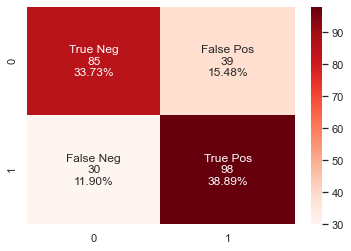

In [38]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot = labels, fmt = '', cmap='Reds');

The figure above represents ```confusion matrix```. 

The obtained matrix shows the following:
- <b>85 true negative predictions:</b> The first 85 observations are zeros predicted correctly.
- <b>30 false negative predictions:</b> These are the ones wrongly predicted as ones.
- <b>39 false positive prediction:</b> The observation is an one that was wrongly predicted as zero.
- <b>98 true positive predictions:</b> The last 98 observations are ones predicted correctly.

## Conclusions <a class="anchor" id="chapter7"></a>

The analysis of Red Wine Quality showed:

- The ```volatile acidity```, ```sulphates``` and ```alcohol``` are the most significant features for wine quality.
- The Logistic Regression Model can accurately(~0.74) and precisely (f1 score 0.74) predict red wine quality based on all his features.



## References: <a class="anchor" id="chapter8"></a>


- https://en.wikibooks.org/wiki/LaTeX/Mathematics#Symbols
- https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8
- https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
- https://towardsdatascience.com/outlier-detection-python-cd22e6a12098
- https://medium.com/nerd-for-tech/hypothesis-testing-on-linear-regression-c2a1799ba964
- https://plotly.com/python/table-subplots/
- https://plotly.com/python/sankey-diagram/
- https://seaborn.pydata.org/generated/seaborn.boxplot.html
- https://machinelearningmastery.com/clustering-algorithms-with-python/
- https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html
- https://realpython.com/linear-regression-in-python/#implementing-linear-regression-in-python
- https://www.marsja.se/pandas-count-occurrences-in-column-unique-values/
- https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity
- https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/#h2_7
- https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
- https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
- https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce
- https://towardsdatascience.com/practical-implem##entation-of-outlier-detection-in-python-90680453b3ce
- https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623
- https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561